In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [93]:
import sys
sys.path.append('../src')
import loading as ld
import importlib
importlib.reload(ld)
import numpy as np

## Inspecting raw data

In [65]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [66]:
data = datagen.flow_from_directory('../data/raw/real_and_fake_face', class_mode='binary', classes=['real', 'fake'])

Found 2041 images belonging to 2 classes.


In [ ]:
def inspect_data_gen(imgs, labels, n_required, class_=0):
    i = 0
    n = 0
    fig, ax = plt.subplots(ncols=n_required,
                           nrows=1,
                           figsize=(4 * n_required, 4))
    while i < n_required:
        if int(labels[n]) == class_:
            ax[i].imshow(imgs[n])
            ax[i].axis('off')
            if class_ == 1:
                ax[i].set_title('fake')
            elif class_ == 0:
                ax[i].set_title('real')
            i += 1
        n += 1

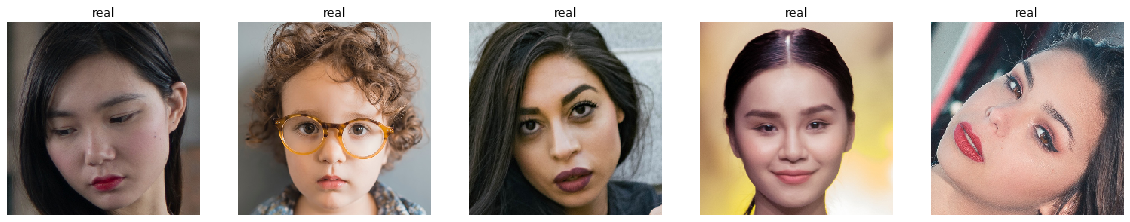

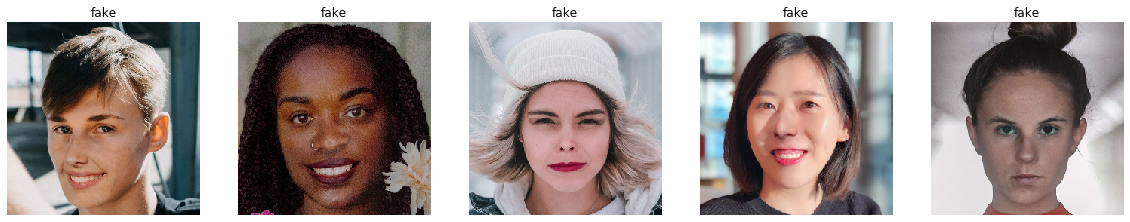

In [67]:
imgs, labels = next(data)
inspect_data(imgs, labels, 5, class_=0)
inspect_data(imgs, labels, 5, class_=1)

## Inspect processed data

This uses the tensorflow data pipeline which is more efficient than the keras data generator used above. This is what was used to train the model. Link to the source code is here.

In [125]:
def inspect_batch(batch, full_label=False):

    imgs = first_batch[0].numpy()
    labels = first_batch[1].numpy()
    if not full_label:
        labels = np.vectorize(lambda x: 'fake' if x == 1 else 'real')(labels)

    batch_size = len(imgs)
    ncols=4
    nrows = batch_size//4
    
    fig, axs = plt.subplots(nrows, ncols, figsize = (4*ncols, 4*nrows))
    axs = axs.ravel()
    for i, ax in enumerate(axs):
        ax.imshow(imgs[i])
        ax.set_title(labels[i])
        ax.axis('off')

In [114]:
data = ld.DsLoader('../data/processed/sf/all')

In [115]:
train = data.get_ds(split='train', augment=True)

In [116]:
it = iter(train)
first_batch = next(it)

In [117]:
first_batch[0].numpy().shape

(32, 64, 64, 3)

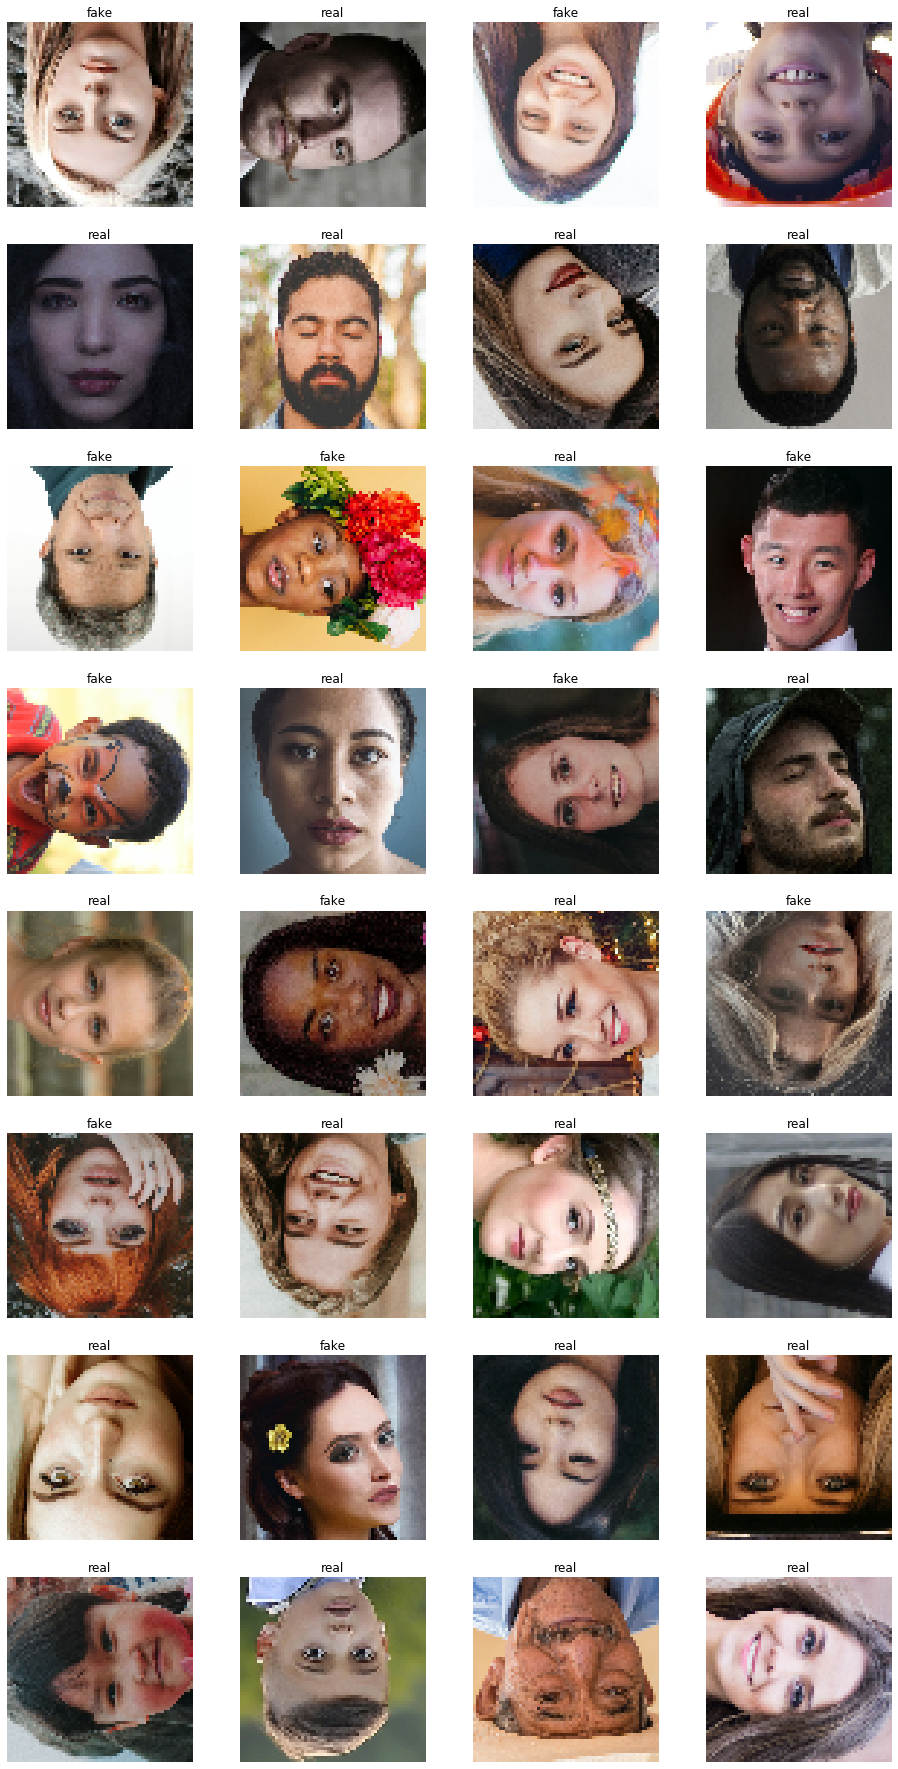

In [118]:
inspect_batch(first_batch)

In [131]:
data = ld.DsLoader('../data/processed/sf/all', full_label=True)

In [134]:
train = data.get_ds(split='train', batch_size=16, augment=False)
it = iter(train)
first_batch = next(it)

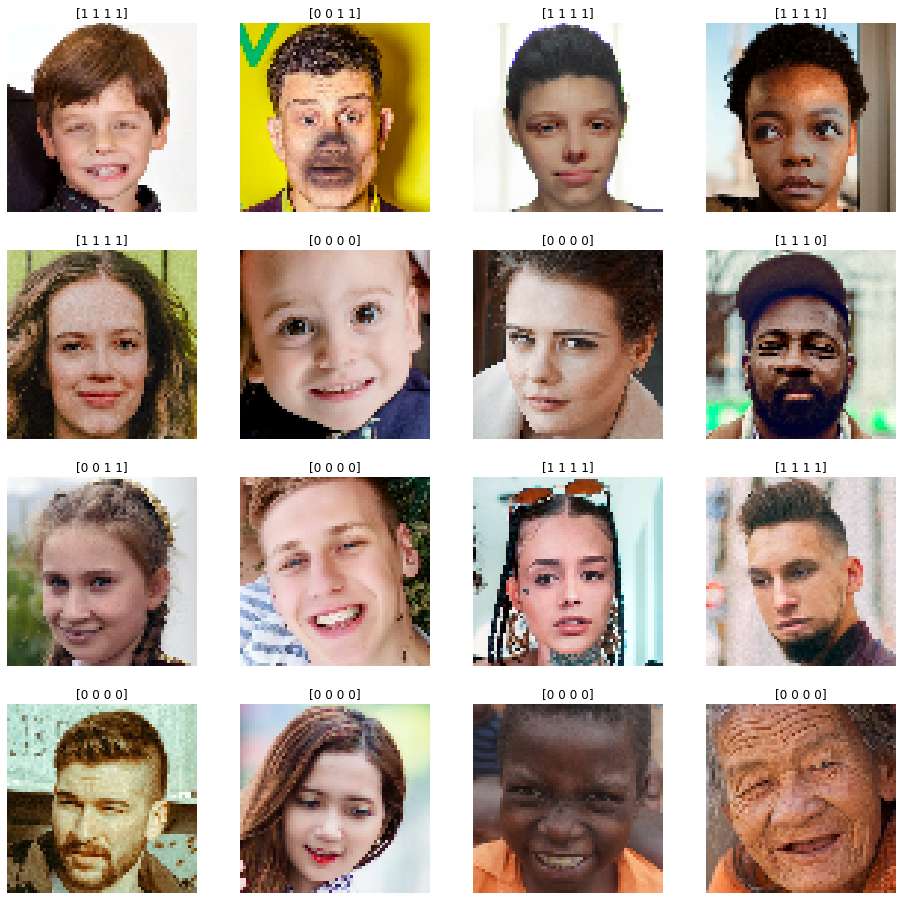

In [135]:
inspect_batch(first_batch, full_label=True)